In [84]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')



In [85]:
#Import the dataset
my_wine = pd.read_csv(r'C:\\Users\\hlala\\Downloads\\das223 (1)\\das223\\Classification\\winequality-white.csv',delimiter=';')
my_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Explanation of our Columns

volatile acidity :   Volatile acidity is the gaseous acids present in wine.

fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic

residual sugar :   Amount of sugar left after fermentation.

citric acid :    It is weak organic acid, found in citrus fruits naturally.

chlorides :   Amount of salt present in wine.

free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
total sulfur dioxide 

pH :   In wine pH is used for checking acidity
density 

sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.

alcohol :   Percent of alcohol present in wine.

In [4]:
#display the 1st five after importing the dataset
my_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [86]:
#check for shape
my_wine.shape

(4898, 12)

In [87]:
#check for null values
print(my_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [88]:
#check for duplicates
my_wine.duplicated().sum()

937

In [89]:
#drop duplicates
my_wine=my_wine.drop_duplicates()

In [90]:
#check the shape after dropping duplicates
my_wine.shape

(3961, 12)

In [91]:
#check the description of your dataset
my_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [92]:
#check the average grouping by my target
my_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.139869,0.382157,0.305229,4.499346,0.050059,23.127451,124.127451,0.994199,3.185425,0.476667,10.197712
5,6.921745,0.303306,0.335957,6.941532,0.052323,36.002979,150.099574,0.995072,3.171779,0.482621,9.864182
6,6.819435,0.261630,0.338227,5.959787,0.045178,35.308166,136.460850,0.993722,3.196029,0.492355,10.646122
7,6.701089,0.265363,0.327358,4.523875,0.037556,33.851234,122.052975,0.992059,3.228462,0.502859,11.515844
8,6.609924,0.286794,0.335038,5.056489,0.036756,35.618321,122.034351,0.991745,3.235115,0.485878,11.880153
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [93]:
my_wine[my_wine['quality' ]   >5].mean()


fixed acidity             6.778875
volatile acidity          0.263946
citric acid               0.335293
residual sugar            5.532357
chlorides                 0.042712
free sulfur dioxide      34.935897
total sulfur dioxide    131.899349
density                   0.993180
pH                        3.206755
sulphates                 0.494749
alcohol                  10.940254
quality                   6.369690
dtype: float64

ANALYSIS



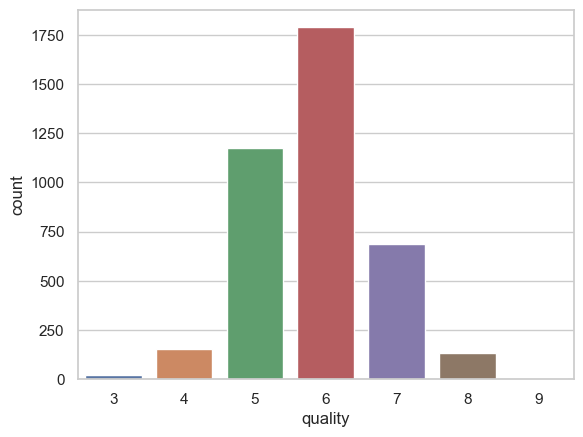

In [94]:
sns.countplot(my_wine['quality'])
plt.show()

In [95]:
my_wine['wine quality'] = my_wine['quality'].apply(lambda x: 'Bad' if x<=5 else 'Good' )
print(my_wine[['quality','wine quality']].value_counts().sort_index())
my_wine.head()

quality  wine quality
3        Bad               20
4        Bad              153
5        Bad             1175
6        Good            1788
7        Good             689
8        Good             131
9        Good               5
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,Good


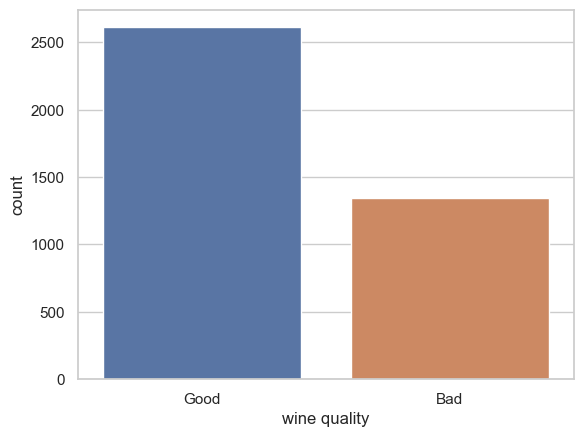

In [96]:
sns.countplot(my_wine['wine quality'])
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

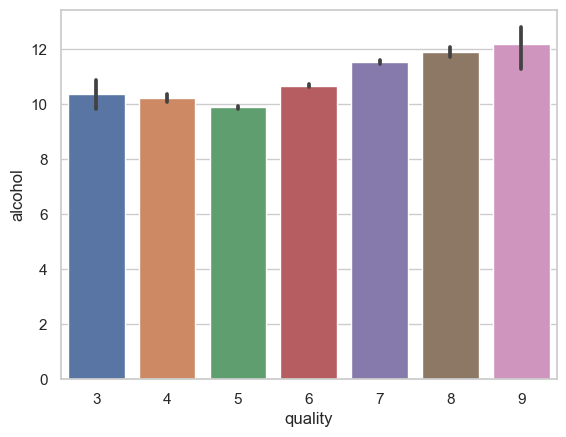

In [98]:
import seaborn
 
 
seaborn.set(style='whitegrid')
 
seaborn.barplot(x="quality",
                    y="alcohol",
                    data=my_wine)



<AxesSubplot:xlabel='alcohol', ylabel='density'>

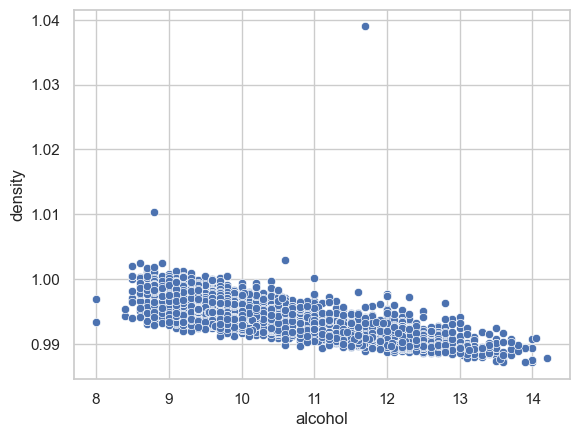

In [99]:
sns.set(style='whitegrid')
 
sns.scatterplot(x="alcohol",
                    y="density",
                    data=my_wine)

<AxesSubplot:title={'center':'Relaionship between fixed acidility and pH based on wine quality'}, xlabel='pH', ylabel='fixed acidity'>

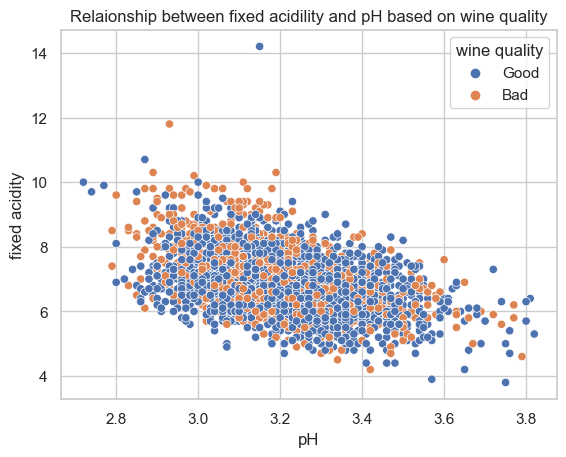

In [100]:
plt.title('Relaionship between fixed acidility and pH based on wine quality')
sns.scatterplot(data=my_wine, x="pH", y="fixed acidity", hue="wine quality")

<AxesSubplot:title={'center':'Relaionship between fixed acidility and alcohol based on wine quality'}, xlabel='alcohol', ylabel='fixed acidity'>

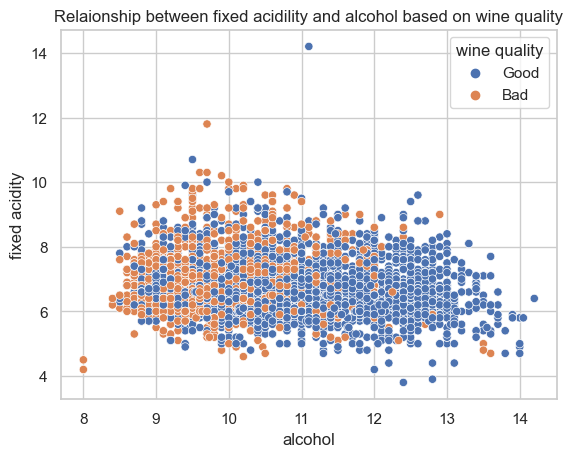

In [101]:
plt.title('Relaionship between fixed acidility and alcohol based on wine quality')
sns.scatterplot(data=my_wine, x="alcohol", y="fixed acidity", hue="wine quality")


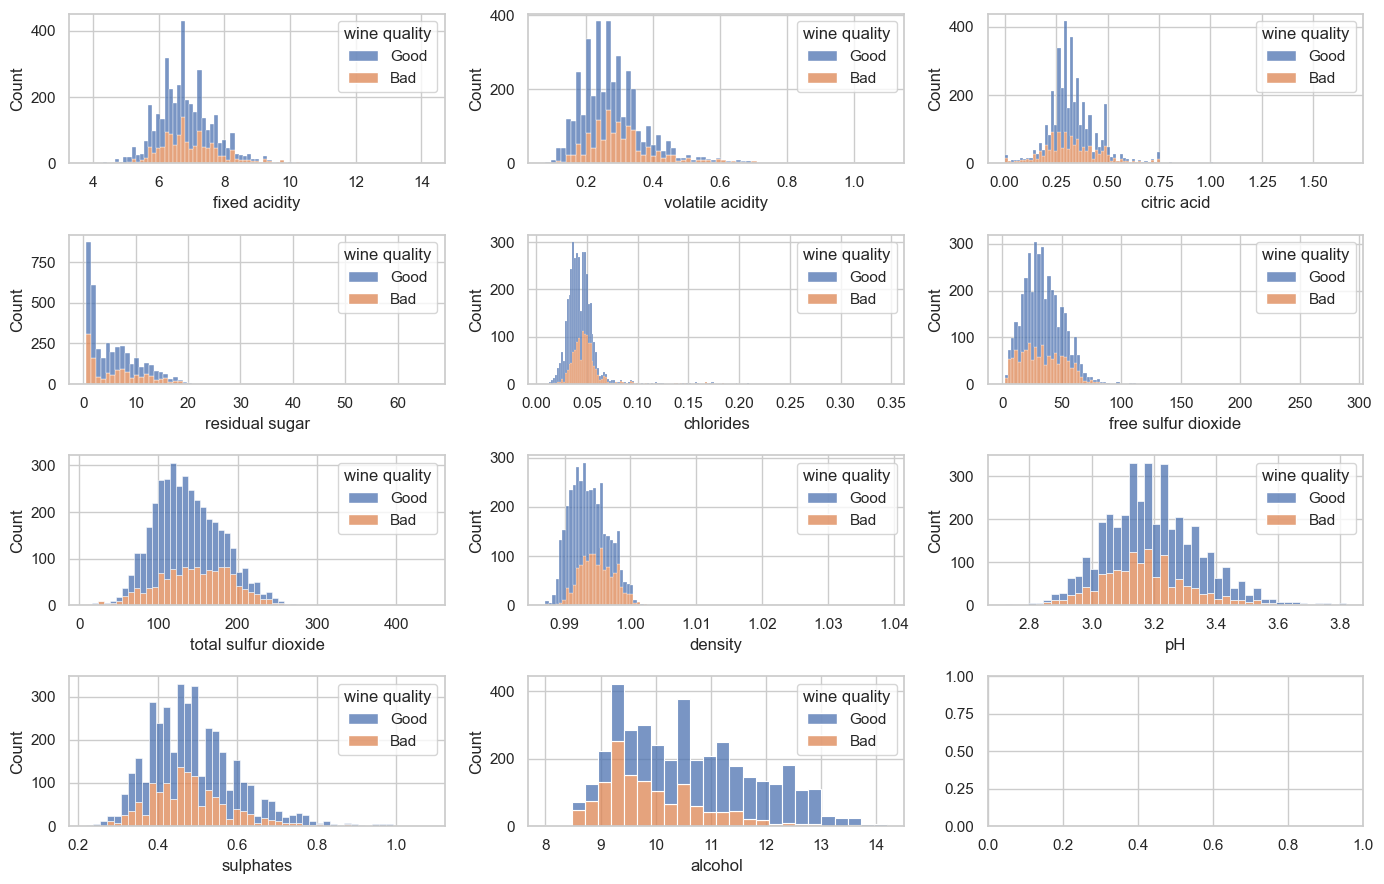

In [102]:
req_cols = my_wine.columns[:-2].values
f,ax1 = plt.subplots(4,3,figsize=(14,9))
counter=0
for r in range(4):
    for c in range(3):
        if counter >10:
            continue
        sns.histplot(data=my_wine,x=req_cols[counter],hue='wine quality',stat='count',multiple='stack',ax=ax1[r][c])
        counter+=1
f.tight_layout()

HEATMP FOR EXPRESSING CORRELATION

For checking correlation we use a statistical method that finds the bonding and relationship between two features.

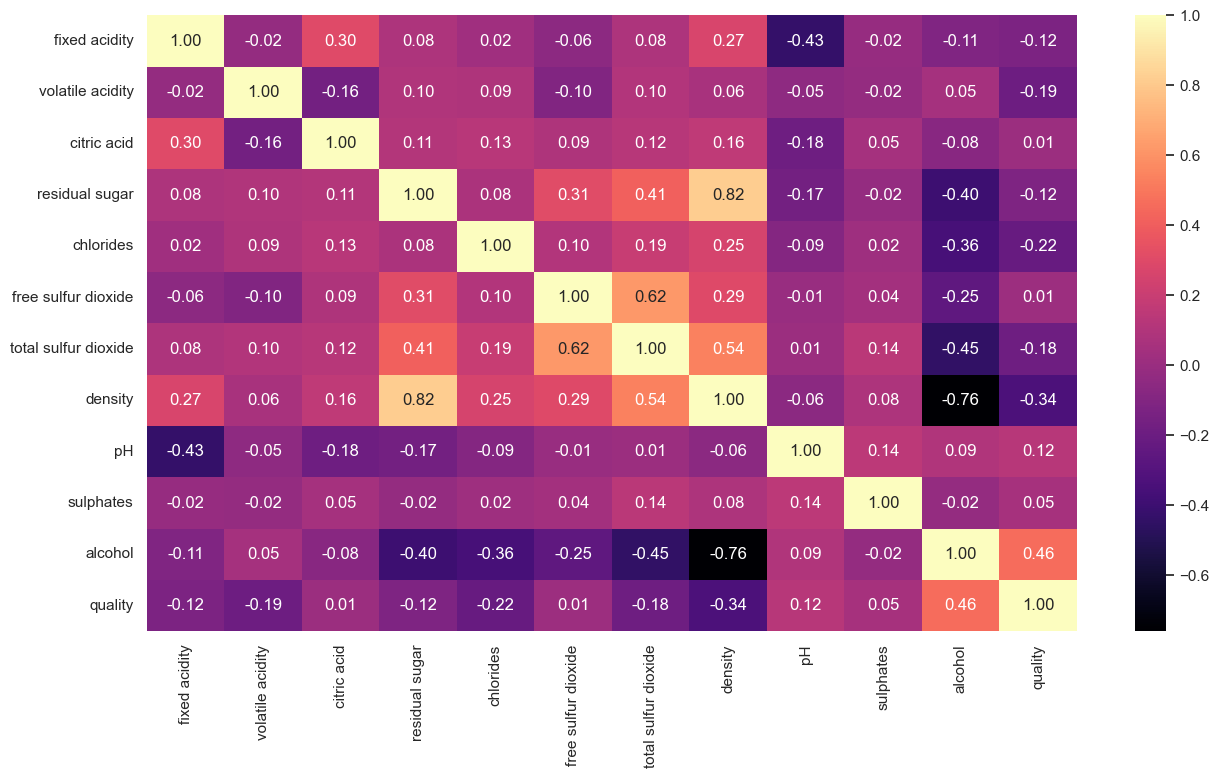

In [103]:
plt.figure(figsize=(15,8))
dataplot=sns.heatmap(my_wine.corr(),annot=True,fmt='.2f',cmap='magma')
  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'density'),
  Text(1, 0, 'chlorides'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'total sulfur dioxide'),
  Text(4, 0, 'fixed acidity'),
  Text(5, 0, 'residual sugar'),
  Text(6, 0, 'citric acid'),
  Text(7, 0, 'free sulfur dioxide'),
  Text(8, 0, 'sulphates'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

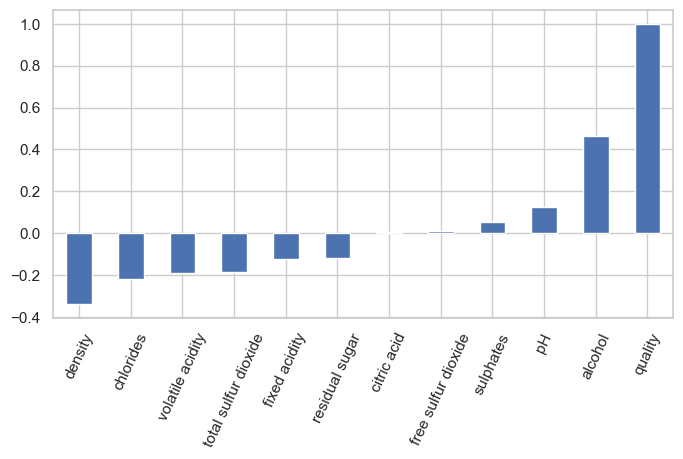

In [104]:
my_wine.corrwith(my_wine['quality']).sort_values().plot(kind= 'bar', figsize=(8,4))
plt.xticks(rotation =65)

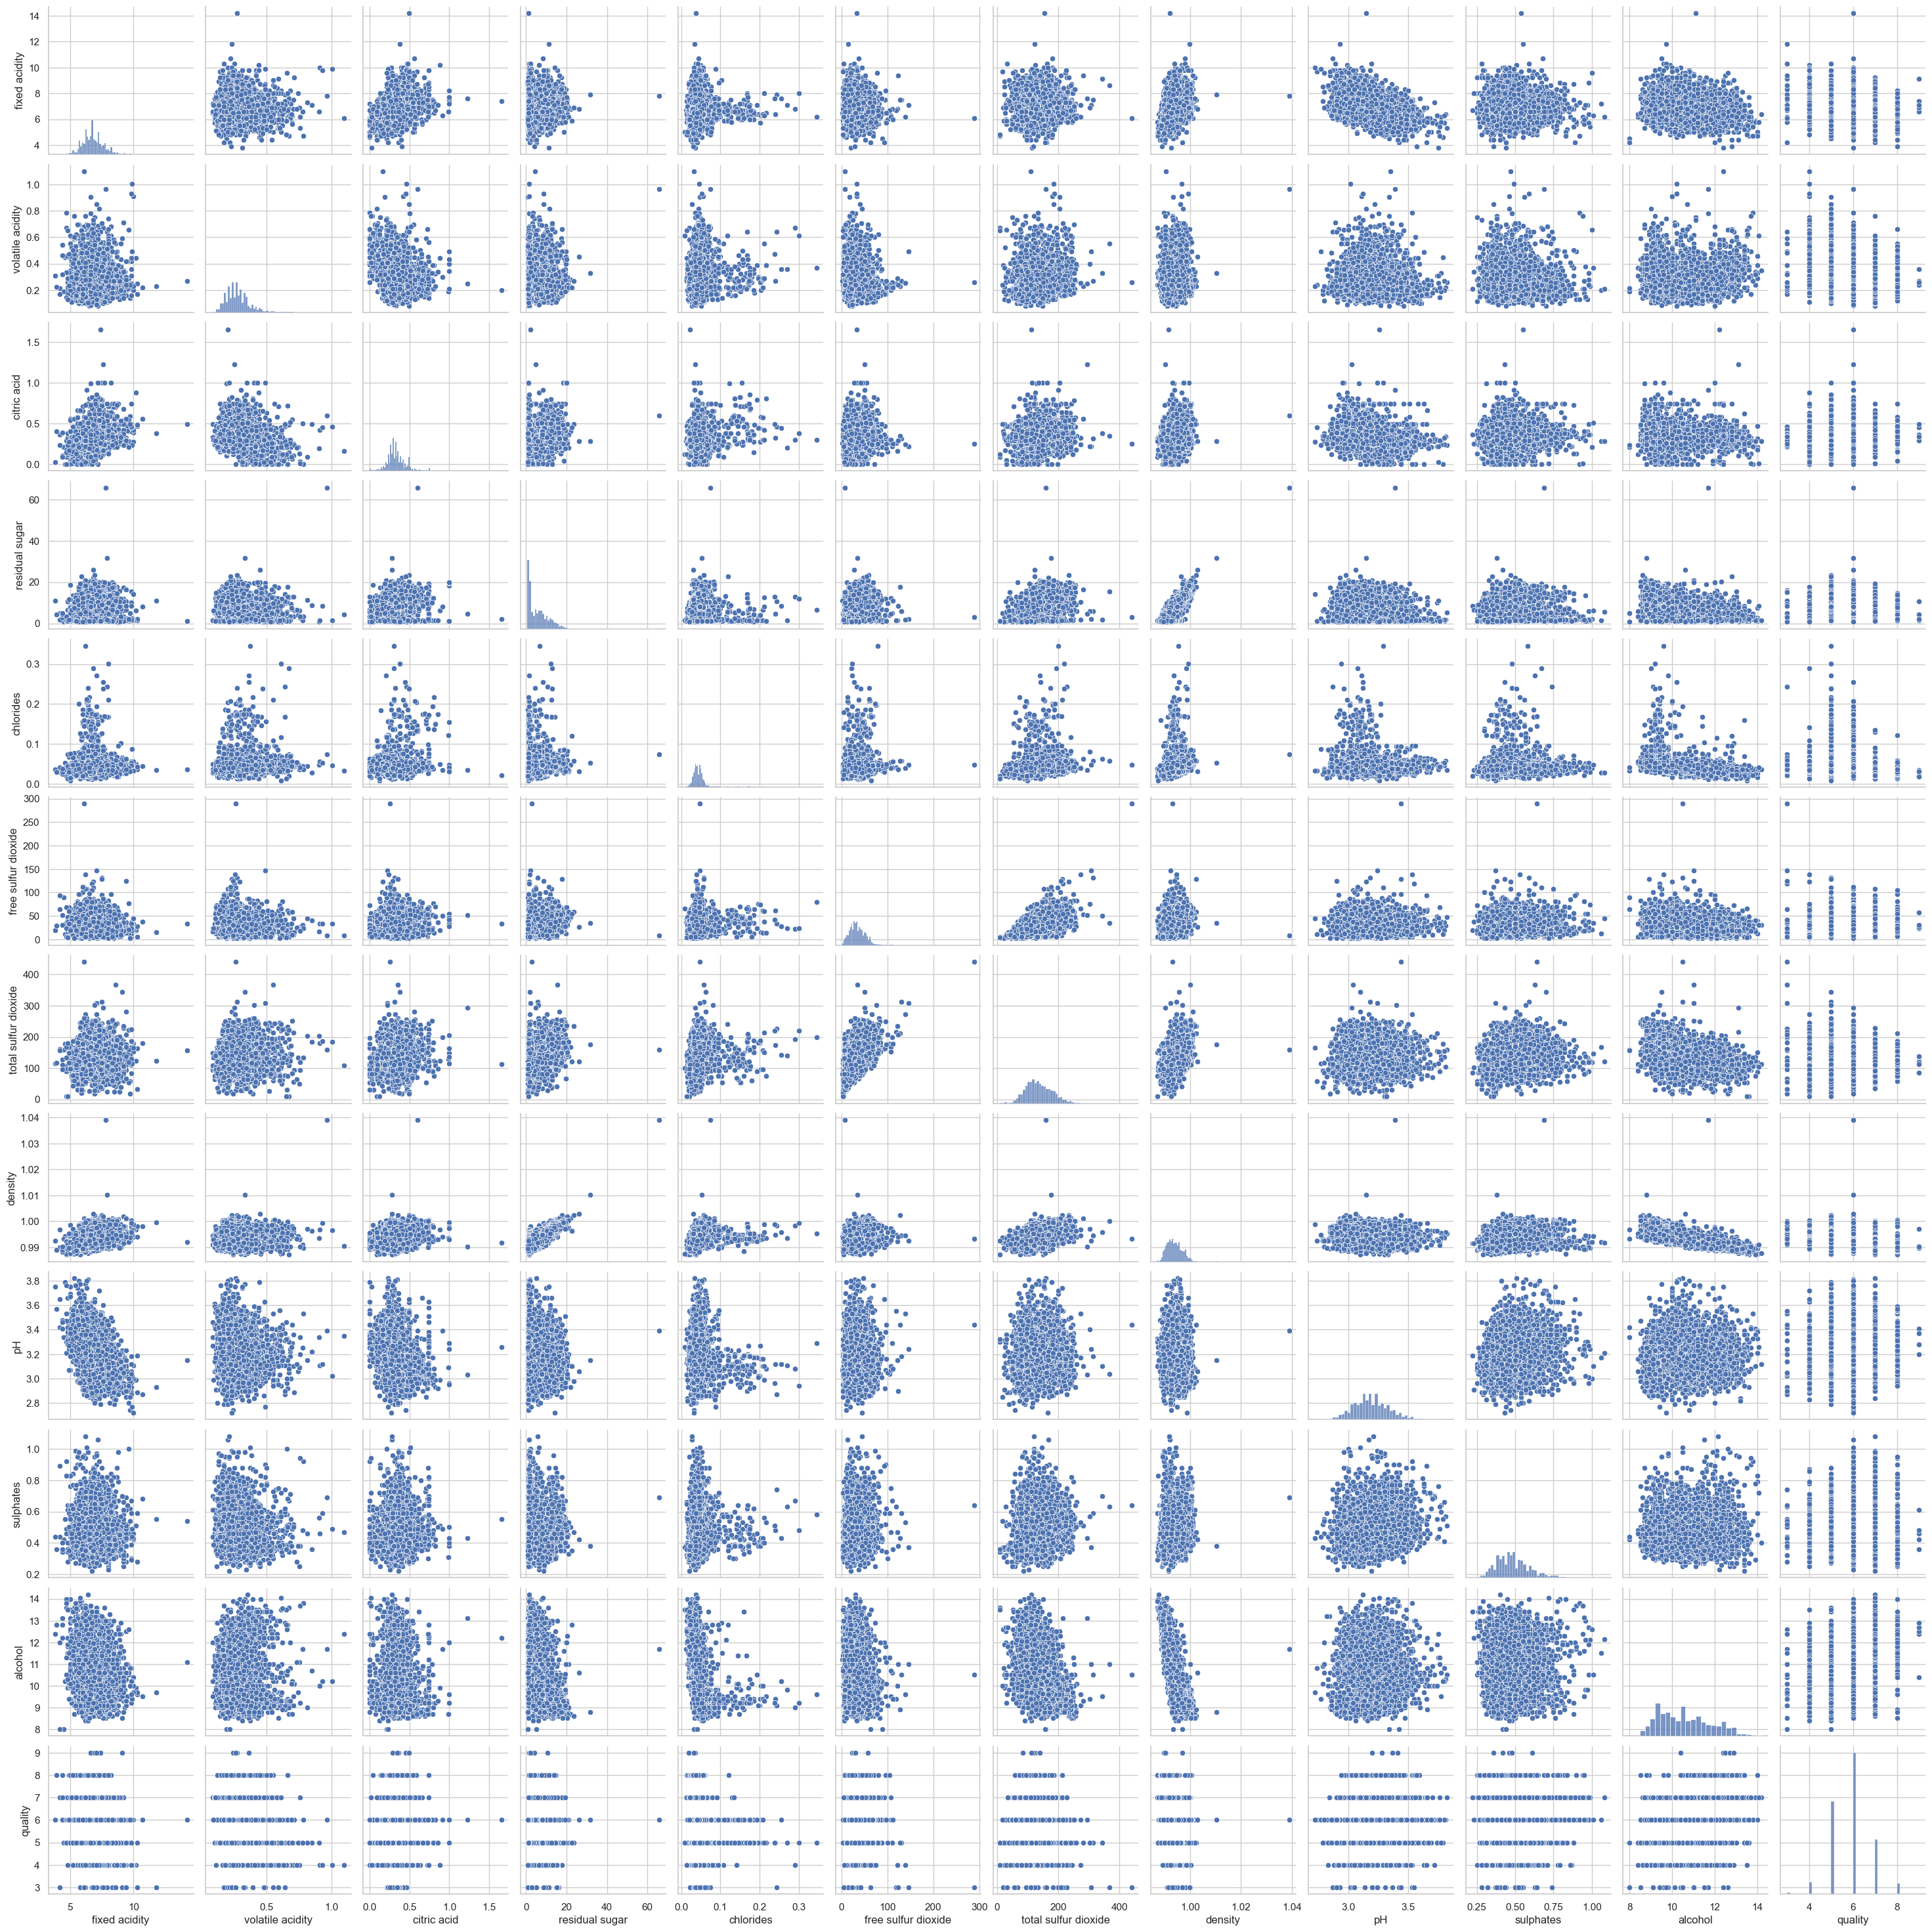

In [105]:
sns.pairplot(my_wine)

DEALING WITH IMBALANCED DATA

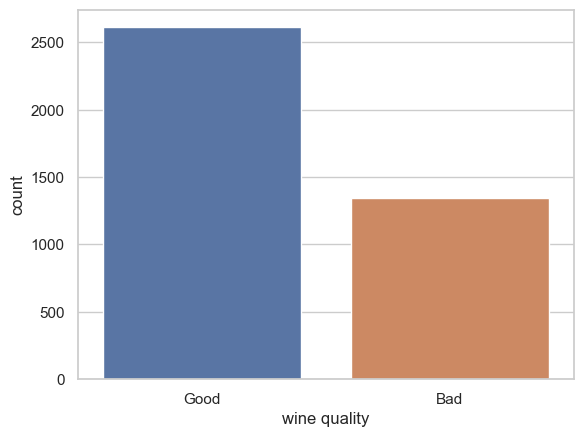

In [107]:
sns.countplot(my_wine['wine quality'])
plt.show()

From the graph above we can see that the dataset is not balance so because of that when we fit the model ,the model is goin to favour the class with high numbers , so we decided to balance our dataset using a technique called over-sampling in machine leaning
which simply means we 

RESAMPLE USING OVER-SAMPLE

In [109]:
# Class count
count_class_0, count_class_1 = my_wine['wine quality'].value_counts()

# Divide by class
df_class_0 = my_wine[my_wine['wine quality'] == 'Good']
df_class_1 = my_wine[my_wine['wine quality'] == 'Bad']

Random over-sampling:
Good    2613
Bad     2613
Name: wine quality, dtype: int64


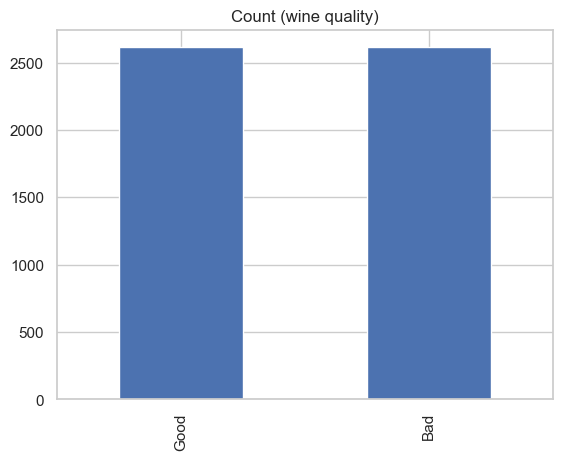

In [110]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
my_wine = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(my_wine['wine quality'].value_counts())

my_wine['wine quality'].value_counts().plot(kind='bar', title='Count (wine quality)');

Ecode the Categorical and Feature Engineering

In [111]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

encoder = LabelEncoder()
my_wine['wine quality'] = encoder.fit_transform(my_wine['wine quality'])

X = my_wine.drop(columns=['wine quality','fixed acidity','volatile acidity'	,'citric acid','chlorides',	'free sulfur dioxide','total sulfur dioxide','sulphates'])
y = my_wine['wine quality']

In [112]:
X

,residual sugar,density,pH,alcohol,quality
0,20.70,1.0010,3.00,8.8,6
1,1.60,0.9940,3.30,9.5,6
2,6.90,0.9951,3.26,10.1,6
3,8.50,0.9956,3.19,9.9,6
6,7.00,0.9949,3.18,9.6,6
...,...,...,...,...,...
361,1.20,0.9941,3.15,8.9,5
4329,8.10,0.9954,3.12,9.4,5
38,17.95,0.9999,3.21,8.6,5
4808,8.30,0.9959,3.19,10.9,5


FEATURE SCALING 

In [113]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,residual sugar,density,pH,alcohol,quality
0,2.937690,2.411981,-1.256579,-1.363188,0.425148
1,-0.925795,-0.035486,0.722629,-0.773915,0.425148
2,0.146271,0.349116,0.458735,-0.268823,0.425148
3,0.469914,0.523935,-0.003080,-0.437187,0.425148
4,0.166499,0.279188,-0.069054,-0.689733,0.425148


SPLIT DATASET INTO TRAINING AND TEST DATA (75% / 25%)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3919, 5) (3919,) (1307, 5) (1307,)


FITTING ON TEST

In [115]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train,y_train)
y_pred_test = model_rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(acc)

1.0


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       645
           1       1.00      1.00      1.00       662

    accuracy                           1.00      1307
   macro avg       1.00      1.00      1.00      1307
weighted avg       1.00      1.00      1.00      1307



Confusion matrix:
 [[645   0]
 [  0 662]]


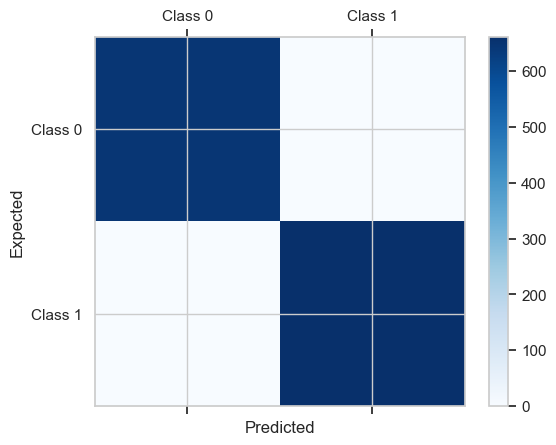

In [117]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

FITTING ON TRAIN

In [118]:
train_prediction = model_rfc.predict(X_train)
train_accuracy=accuracy_score(y_train,train_prediction)
print('Accuracy score for train: ',train_accuracy)


Accuracy score for train:  1.0


In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_train, train_prediction)
prec = precision_score(y_train, train_prediction)
rec = recall_score(y_train, train_prediction)
f1 = f1_score(y_train, train_prediction)
results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest       1.0        1.0     1.0       1.0
